In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("heart_cleveland_upload.csv")

In [6]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [45]:
X=df.drop('condition', axis=1)
y= df['condition']

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('condition', axis=1), df['condition'], test_size=0.2, random_state=42, stratify=y)

In [51]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = rf_classifier.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8833333333333333


In [56]:
performance=classification_report(y_test,y_pred)

In [57]:
performance

'              precision    recall  f1-score   support\n\n           0       0.84      0.97      0.90        32\n           1       0.96      0.79      0.86        28\n\n    accuracy                           0.88        60\n   macro avg       0.90      0.88      0.88        60\nweighted avg       0.89      0.88      0.88        60\n'

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test, y_pred)

array([[31,  1],
       [ 6, 22]])

In [60]:
print(performance)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  1]
 [ 6 22]]


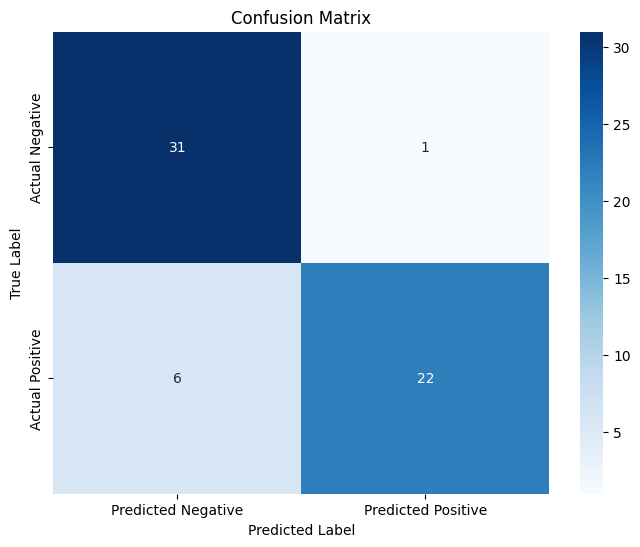

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

XGBoost Model

In [63]:
import xgboost as xgb

In [64]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
model.save_model('model.bin')

/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1118: UserWarning: [00:48:08] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)


In [66]:
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('model.bin')

y_pred_xgb = loaded_model.predict(X_test)
print("XGBoost Predictions:", y_pred_xgb)

XGBoost Predictions: [0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1]


/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py:1127: UserWarning: [00:48:09] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `bin`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)


In [67]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.85


In [68]:
performance_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:\n", performance_xgb)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



XGBoost Confusion Matrix:
 [[29  3]
 [ 6 22]]


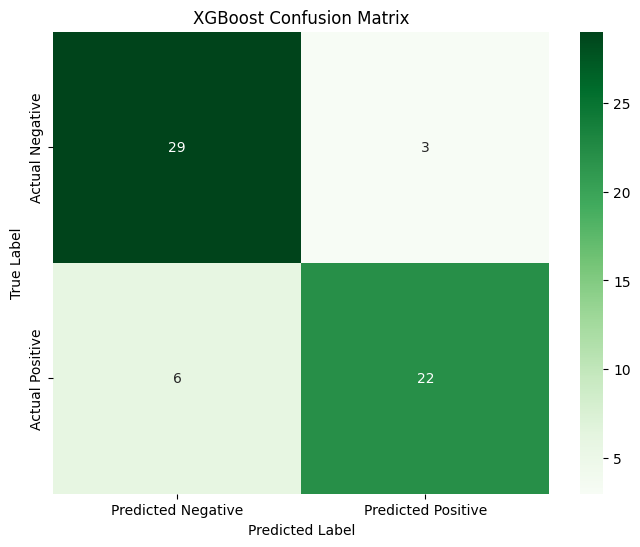

In [69]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Random Forest Model Performance

In [70]:
print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:\n", performance)
print("Random Forest Confusion Matrix:\n", cm)

Random Forest Accuracy: 0.8833333333333333
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

Random Forest Confusion Matrix:
 [[31  1]
 [ 6 22]]


### XGBoost Model Performance

In [71]:
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", performance_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

XGBoost Accuracy: 0.85
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

XGBoost Confusion Matrix:
 [[29  3]
 [ 6 22]]


In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [74]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Predictions:", y_pred_lr)

Logistic Regression Predictions: [0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]


In [75]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.9


In [76]:
performance_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", performance_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



In [77]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

Logistic Regression Confusion Matrix:
 [[32  0]
 [ 6 22]]


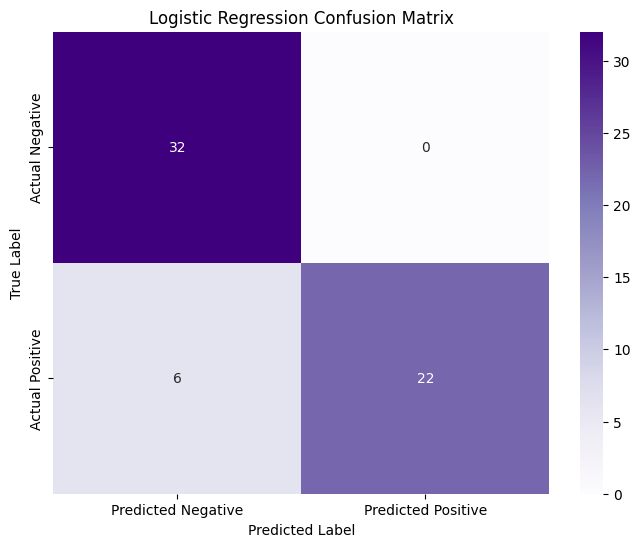

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Purples', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [79]:
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", performance_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

Logistic Regression Accuracy: 0.9
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

Logistic Regression Confusion Matrix:
 [[32  0]
 [ 6 22]]


In [80]:
print("Random Forest Model Performance:")
print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:\n", performance)
print("Random Forest Confusion Matrix:\n", cm)

print("\nXGBoost Model Performance:")
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", performance_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

print("\nLogistic Regression Model Performance:")
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", performance_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

Random Forest Model Performance:
Random Forest Accuracy: 0.8833333333333333
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

Random Forest Confusion Matrix:
 [[31  1]
 [ 6 22]]

XGBoost Model Performance:
XGBoost Accuracy: 0.85
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

XGBoost Confusion Matrix:
 [[29  3]
 [ 6 22]]

Logistic Regression Model Performance:
Logistic Re